In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [4]:
with open("headings.csv","r") as file:
    heading = file.readline()
    heading = heading.split(",")
    #print(heading)
dataset = pd.read_csv("dataset.csv",names=heading)
dataset.head(10)

,id,title,authors,abstract,subjects,class,is_pdf,is_source,pub_date,update_date
0,1809.03478v1,Towards a Fatality-Aware Benchmark of Probabil...,"[""Wei Zhan"", ""Liting Sun"", ""Yeping Hu"", ""Jiach...",Autonomous vehicles should be able to generate...,"[""cs.RO"", ""cs.AI""]",cs.AI,NaN,NaN,2018-09-10 17:48:58,2018-09-10 17:48:58
1,1809.03470v1,ViZDoom Competitions: Playing Doom from Pixels,"[""Marek Wydmuch"", ""Micha\u0142 Kempka"", ""Wojci...",This paper presents the first two editions of ...,"[""cs.AI"", ""cs.CV"", ""cs.LG"", ""stat.ML""]",cs.AI,NaN,NaN,2018-09-10 17:41:39,2018-09-10 17:41:39
2,1809.03449v1,Exploring Machine Reading Comprehension with E...,"[""Chao Wang"", ""Hui Jiang""]",To apply general knowledge to machine reading ...,"[""cs.AI""]",cs.AI,NaN,NaN,2018-09-10 16:42:22,2018-09-10 16:42:22
3,1809.03428v1,Not Just Privacy: Improving Performance of Pri...,"[""Ji Wang"", ""Jianguo Zhang"", ""Weidong Bao"", ""X...",The increasing demand for on-device deep learn...,"[""cs.LG"", ""cs.AI"", ""cs.DC"", ""stat.ML""]",cs.AI,NaN,NaN,2018-09-10 16:09:58,2018-09-10 16:09:58
4,1809.03406v1,Keep it stupid simple,"[""Erik J Peterson"", ""Necati Alp M\u00fcyesser""...",Deep reinforcement learning can match and exce...,"[""cs.AI""]",cs.AI,NaN,NaN,2018-09-10 15:43:57,2018-09-10 15:43:57
5,1809.03363v1,Torchbearer: A Model Fitting Library for PyTorch,"[""Ethan Harris"", ""Matthew Painter"", ""Jonathon ...","We introduce torchbearer, a model fitting libr...","[""cs.LG"", ""cs.AI"", ""cs.CV"", ""stat.ML""]",cs.AI,NaN,NaN,2018-09-10 14:46:35,2018-09-10 14:46:35
6,1809.03359v1,Improving Optimization Bounds using Machine Le...,"[""Quentin Cappart"", ""Emmanuel Goutierre"", ""Dav...",Finding tight bounds on the optimal solution i...,"[""cs.AI""]",cs.AI,NaN,NaN,2018-09-10 14:41:17,2018-09-10 14:41:17
7,1809.03272v1,Privacy-Preserving Deep Learning for any Activ...,"[""Le Trieu Phong"", ""Tran Thi Phuong""]",This paper considers the scenario that multipl...,"[""cs.LG"", ""cs.AI"", ""cs.CR"", ""stat.ML"", ""68P25,...",cs.AI,NaN,NaN,2018-09-10 12:36:05,2018-09-10 12:36:05
8,1809.03260v1,Automated Test Generation to Detect Individual...,"[""Aniya Agarwal"", ""Pranay Lohia"", ""Seema Nagar...",Dependability on AI models is of utmost import...,"[""cs.AI""]",cs.AI,NaN,NaN,2018-09-10 12:11:21,2018-09-10 12:11:21
9,1809.03202v1,Learning Sequence Encoders for Temporal Knowle...,"[""Alberto Garc\u00eda-Dur\u00e1n"", ""Sebastijan...",Research on link prediction in knowledge graph...,"[""cs.AI""]",cs.AI,NaN,NaN,2018-09-10 09:17:04,2018-09-10 09:17:04


In [5]:
# extract features from abstract
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams


# use english stop_words
stop_words =  list(stopwords.words('english'))

# make a function to split words and choose only alphabetic and words that are not in stop words list
def alphabetic_only(x_string):
    tokens = word_tokenize(x_string.lower())
    #bigrams = ngrams(token,2)
    # remove all tokens that are not alphabetic
    words = " ".join([word for word in tokens if word.isalpha() and word not in stop_words and len(word)>3])
    return words

def alphabetic_only_l(x_string):
    tokens = word_tokenize(x_string.lower())
    # remove all tokens that are not alphabetic
    words = [word for word in tokens if word.isalpha() and word not in stop_words and len(word)>3]
    return words

In [6]:
abstract_clean = dataset.abstract.apply(lambda my_str: alphabetic_only(my_str))

In [7]:
abstract_clean.head()

0    autonomous vehicles able generate accurate pro...
1    paper presents first editions visual doom comp...
2    apply general knowledge machine reading compre...
3    increasing demand deep learning services calls...
4    deep reinforcement learning match exceed human...
Name: abstract, dtype: object

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# decrease to only using 10thousands feature
no_features = 10000
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features)
tfidf = tfidf_vectorizer.fit_transform(abstract_clean)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features)
tf = tf_vectorizer.fit_transform(abstract_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [22]:
# use tfidf_feature_names for the classification
abstract_tfidf = []
for x in abstract_clean:
    temp_y = []
    for y in x.split(" "):
        if y in tfidf_feature_names:
            temp_y.append(y)
    abstract_tfidf.append(temp_y)

In [20]:
# make a neural net
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tflearn.data_utils import to_categorical, pad_sequences

Using TensorFlow backend.


In [24]:
from gensim import corpora
dictionary = corpora.Dictionary(abstract_tfidf)
corpus = [dictionary.doc2bow(text) for text in abstract_tfidf]

In [35]:
cvector = CountVectorizer()
abstract_tfidf_clean =  [" ".join(x) for x in abstract_tfidf]
bow = cvector.fit_transform(abstract_tfidf_clean)
label_class = dataset["class"].unique()
label_class

array(['cs.AI', 'cs.AR', 'cs.CC', 'cs.CE', 'cs.CG', 'cs.CL', 'cs.CR',
       'cs.CV', 'cs.CY', 'cs.DB', 'cs.DC', 'cs.DL', 'cs.DM', 'cs.DS',
       'cs.ET', 'cs.FL', 'cs.GL', 'cs.GR', 'cs.GT', 'cs.HC', 'cs.IR',
       'cs.IT', 'cs.LG', 'cs.LO', 'cs.MA', 'cs.MM', 'cs.MS', 'cs.NA',
       'cs.NE', 'cs.NI', 'cs.OH', 'cs.OS', 'cs.PF', 'cs.PL', 'cs.RO',
       'cs.SC', 'cs.SD', 'cs.SE', 'cs.SI', 'cs.SY'], dtype=object)

In [133]:
from keras.layers import Input
from keras.models import Model


model = Sequential()
# input layer
model.add(keras.layers.Dense(5000,input_shape=(bow.shape[1],),activation='relu'))

# hidden layer
model.add(keras.layers.Dense(1000,activation='relu'))
model.add(keras.layers.Dense(500,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))

# output layer
model.add(keras.layers.Dense(len(label_class),activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [64]:
import json
def labeling_subjects(subjects):
    subs = json.loads(subjects)
    output = np.zeros(len(label_class),dtype=int)
    for sub in [np.argwhere(label_class==sub) for sub in subs]:
        if len(sub)>0:
            output[sub] = 1
    return output

In [65]:
y_ok = dataset["class"].apply(lambda x:np.argwhere(label_class==x)[0][0])

In [142]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
skf = StratifiedKFold(n_splits=10)
test_split = skf.split(tfidf, y_ok.values)
train, test = list(test_split)[0]

In [143]:
test

array([    0,     1,     2, ..., 36456, 36457, 36458])

In [144]:
# processing the model

import random

mini_batch = 1000
total_docs = len(train)
total_batch = int(len(train)/mini_batch)+1
#range_docs = range(0,total_docs)
range_docs = train

X_test = bow[test].toarray()
y_test = np.array([])
for x in dataset.iloc[test].subjects:
    y_test = np.append(y_test,labeling_subjects(x),axis=0)
y_test = y_test.reshape(len(test),len(label_class))

for batch in range(total_batch):
    # random sample dataset
    r_index = random.sample(list(range_docs),mini_batch)
    X_batch = bow[r_index].toarray()
    #y_batch = dataset.iloc[r_index].subjects.apply(lambda x:labeling_subjects(x))
    y_batch = np.array([])
    for x in dataset.iloc[r_index].subjects:
        y_batch = np.append(y_batch,labeling_subjects(x),axis=0)

    y_batch = y_batch.reshape(len(r_index),len(label_class))
    model.fit(X_batch,y_batch,epochs=1,batch_size=200,validation_data=(X_test,y_test))

Train on 1000 samples, validate on 3739 samples
Epoch 1/1
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0141 - categorical_accuracy: 0.8210 - val_loss: 0.0958 - val_categorical_accuracy: 0.5381
Train on 1000 samples, validate on 3739 samples
Epoch 1/1
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0162 - categorical_accuracy: 0.7940 - val_loss: 0.0959 - val_categorical_accuracy: 0.5360
Train on 1000 samples, validate on 3739 samples
Epoch 1/1
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0156 - categorical_accuracy: 0.7930 - val_loss: 0.0972 - val_categorical_accuracy: 0.5469
Train on 1000 samples, validate on 3739 samples
Epoch 1/1
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0147 - categorical_accuracy: 0.8120 - val_loss: 0.0976 - val_categorical_accuracy: 0.5413
Train on 1000 samples, validate on 3739 samples
Epoch 1/1
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0161 

In [68]:
X_test = bow[test].toarray()
#y_batch = dataset.iloc[r_index].subjects.apply(lambda x:labeling_subjects(x))
y_test = np.array([])
for x in dataset.iloc[test].subjects:
    y_test = np.append(y_test,labeling_subjects(x),axis=0)
y_test = y_test.reshape(len(test),len(label_class))

In [69]:
def labeling_subjects_normal(sub):
    output = np.zeros(len(label_class),dtype=int)
    output[sub] = 1
    return output

In [70]:
y_pred = np.array([])
for x in pred:
    y_pred = np.append(y_pred,labeling_subjects_normal(x),axis=0)
y_pred = y_pred.reshape(len(test),len(label_class))

In [71]:
pred = model.predict_classes(X_test)

In [72]:
sum(y_pred[y_pred==1]==y_test[y_pred==1])/y_pred.shape[0]

0.66140679326023

In [104]:
label_class[np.argsort(model.predict_proba(X_test[3001:3002]))[:,::-1]]

array([['cs.RO', 'cs.OH', 'cs.SY', 'cs.MA', 'cs.CY', 'cs.CV', 'cs.SE',
        'cs.SD', 'cs.NI', 'cs.FL', 'cs.LG', 'cs.GR', 'cs.CG', 'cs.HC',
        'cs.IR', 'cs.PL', 'cs.CE', 'cs.NE', 'cs.AI', 'cs.NA', 'cs.GT',
        'cs.MM', 'cs.LO', 'cs.SI', 'cs.PF', 'cs.ET', 'cs.CR', 'cs.AR',
        'cs.DL', 'cs.CL', 'cs.IT', 'cs.DM', 'cs.MS', 'cs.DC', 'cs.DB',
        'cs.SC', 'cs.GL', 'cs.DS', 'cs.OS', 'cs.CC']], dtype=object)

In [105]:
np.sort(model.predict_proba(X_test[3001:3002]))[:,::-1]

array([[6.6720152e-01, 1.3610247e-01, 6.9898769e-02, 5.1547684e-02,
        2.3630008e-02, 2.0518173e-02, 1.2041900e-02, 8.5129933e-03,
        8.1237480e-03, 6.8534394e-03, 5.0822864e-03, 3.8696520e-03,
        3.6587599e-03, 2.9616163e-03, 1.8139862e-03, 1.7539781e-03,
        1.4072191e-03, 7.3892059e-04, 7.2795292e-04, 6.1372720e-04,
        6.0378789e-04, 5.9071463e-04, 5.5125199e-04, 3.7447168e-04,
        2.9967091e-04, 2.0530540e-04, 1.7777954e-04, 1.5477311e-04,
        1.4178726e-04, 8.2605402e-05, 8.0479214e-05, 7.8171237e-05,
        6.9043177e-05, 6.1037717e-05, 1.5139238e-05, 1.3125244e-05,
        5.1788502e-06, 4.1684252e-06, 3.1821405e-06, 9.3186856e-07]],
      dtype=float32)

In [91]:
dataset.iloc[test].iloc[3:4,]

,id,title,authors,abstract,subjects,class,is_pdf,is_source,pub_date,update_date
3,1809.03428v1,Not Just Privacy: Improving Performance of Pri...,"[""Ji Wang"", ""Jianguo Zhang"", ""Weidong Bao"", ""X...",The increasing demand for on-device deep learn...,"[""cs.LG"", ""cs.AI"", ""cs.DC"", ""stat.ML""]",cs.AI,NaN,NaN,2018-09-10 16:09:58,2018-09-10 16:09:58


In [106]:
dataset.iloc[test].iloc[3001:3002,:]

,id,title,authors,abstract,subjects,class,is_pdf,is_source,pub_date,update_date
29916,1807.11264v1,Real Time Lidar and Radar High-Level Fusion fo...,"[""Hatem Hajri"", ""Mohamed-Cherif Rahal""]",- Both Lidars and Radars are sensors for obsta...,"[""cs.RO"", ""cs.PF""]",cs.PF,NaN,NaN,2018-07-30 09:58:48,2018-07-30 09:58:48


In [107]:
dataset.iloc[test].iloc[3001:3002,:].abstract.values

array(['- Both Lidars and Radars are sensors for obstacle detection. While Lidars are\r\nvery accurate on obstacles positions and less accurate on their velocities,\r\nRadars are more precise on obstacles velocities and less precise on their\r\npositions. Sensor fusion between Lidar and Radar aims at improving obstacle\r\ndetection using advantages of the two sensors. The present paper proposes a\r\nreal-time Lidar/Radar data fusion algorithm for obstacle detection and tracking\r\nbased on the global nearest neighbour standard filter (GNN). This algorithm is\r\nimplemented and embedded in an automative vehicle as a component generated by a\r\nreal-time multisensor software. The benefits of data fusion comparing with the\r\nuse of a single sensor are illustrated through several tracking scenarios (on a\r\nhighway and on a bend) and using real-time kinematic sensors mounted on the ego\r\nand tracked vehicles as a ground truth.'],
      dtype=object)

In [150]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

# set number of topics
# breakdown into two times of the classes
num_topics = 80

lda = LatentDirichletAllocation(n_topics=num_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [214]:
def display_topics(model, feature_names, no_top_words):
    topic_result = {}
    for topic_idx, topic in enumerate(model.components_):
        #print("Topic %d:" % (topic_idx))
        topic_result["Topic %d" % (topic_idx)] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        #print(" ".join([feature_names[i]
        #                for i in topic.argsort()[:-no_top_words - 1:-1]]))
    return topic_result

no_top_words = 10
#display_topics(nmf, tfidf_feature_names, no_top_words)
topic_df = pd.DataFrame(display_topics(lda, tf_feature_names, no_top_words))
#topic_df.to_csv("topic_lda.csv")

In [225]:
topic_df["Topic 21"]

0         systems
1          system
2            data
3           users
4            user
5           paper
6    applications
7          design
8         present
9            many
Name: Topic 21, dtype: object

In [152]:
output_cluster = lda.transform(tf)

In [156]:
dataset["cluster"] = output_cluster.argmax(axis=1)

In [175]:
dataset.groupby(["class","cluster"],as_index=False).count().iloc[:,[0,1,2]].head()

,class,cluster,id
0,cs.AI,3,3
1,cs.AI,4,6
2,cs.AI,5,5
3,cs.AI,7,10
4,cs.AI,8,360


In [177]:
dataset.groupby(["class","cluster"],as_index=False).count().iloc[:,[0,1,2]].values

array([['cs.AI', 3, 3],
       ['cs.AI', 4, 6],
       ['cs.AI', 5, 5],
       ...,
       ['cs.SY', 57, 18],
       ['cs.SY', 64, 2],
       ['cs.SY', 69, 1]], dtype=object)

In [180]:
#pd.DataFrame({"a":{"2":1,}})
digest = {}
for x in dataset.groupby(["class","cluster"],as_index=False).count().iloc[:,[0,1,2]].values:
    if x[0] not in digest.keys():
        digest[x[0]] = {}
    if x[1] not in digest[x[0]].keys():
        digest[x[0]][x[1]] = x[2]

In [183]:
digest_pd = pd.DataFrame(digest).transpose()

In [192]:
digest_pd[pd.isnull(digest_pd)]=0

In [218]:
digest_pd.head()

,1,2,3,4,5,7,8,9,12,13,...,65,67,69,71,72,73,74,76,77,78
cs.AI,0.0,0.0,3.0,6.0,5.0,10.0,360.0,17.0,75.0,3.0,...,0.0,1.0,1.0,2.0,1.0,16.0,1.0,1.0,3.0,2.0
cs.AR,0.0,0.0,1.0,5.0,174.0,1.0,33.0,0.0,139.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cs.CC,0.0,8.0,0.0,4.0,0.0,1.0,7.0,2.0,6.0,0.0,...,0.0,0.0,13.0,0.0,1.0,0.0,0.0,0.0,0.0,33.0
cs.CE,0.0,0.0,0.0,0.0,1.0,3.0,112.0,3.0,215.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
cs.CG,1.0,18.0,3.0,0.0,0.0,2.0,63.0,0.0,56.0,0.0,...,0.0,0.0,2.0,0.0,1.0,4.0,0.0,0.0,4.0,97.0


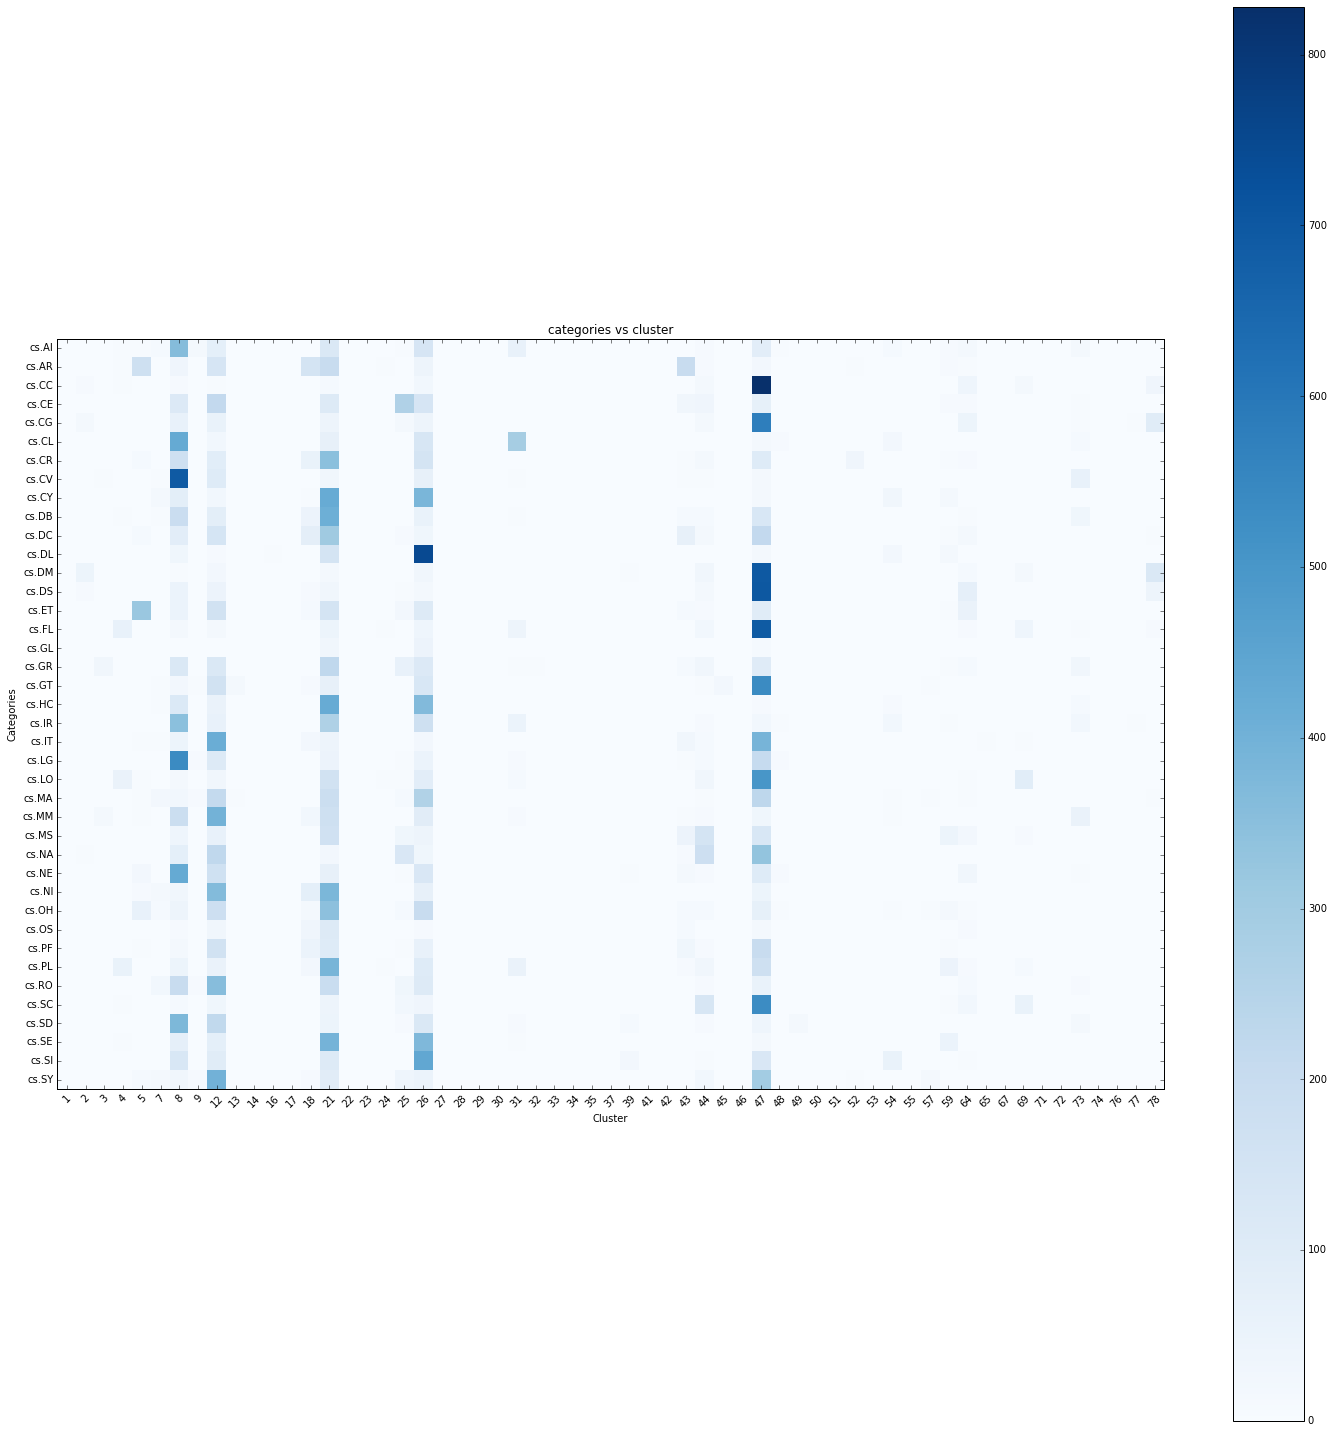

In [211]:
%matplotlib inline
import itertools

cmap = plt.cm.Blues
cm = digest_pd.as_matrix()
title="categories vs cluster"

plt.figure(figsize=(20,20))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks_y = np.arange(len(digest_pd.index.values))
tick_marks_x = np.arange(len(digest_pd.columns.values))
plt.xticks(tick_marks_x, digest_pd.columns.values, rotation=45)
plt.yticks(tick_marks_y, digest_pd.index.values)

fmt = '.2f'
#if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, "",
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Categories')
plt.xlabel('Cluster')


In [9]:
abstract_clean_l = dataset.abstract.apply(lambda my_str: alphabetic_only_l(my_str))
from gensim import corpora
dictionary = corpora.Dictionary(abstract_clean_l)
corpus = [dictionary.doc2bow(text) for text in abstract_clean_l]

In [219]:
import gensim
NUM_TOPICS = 80
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

In [220]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [229]:
import pickle
with open("lda_model.pickle","wb") as checkpoint:
    pickle.dump((lda,ldamodel),checkpoint)

In [46]:
from hlda.sampler import HierarchicalLDA


In [47]:
n_samples = 500       # no of iterations for the sampler
alpha = 10.0          # smoothing over level distributions
gamma = 1.0           # CRP smoothing parameter; number of imaginary customers at next, as yet unused table
eta = 0.1             # smoothing over topic-word distributions
num_levels = 3        # the number of levels in the tree
display_topics = 50   # the number of iterations between printing a brief summary of the topics so far
n_words = 5           # the number of most probable words to print for each topic after model estimation
with_weights = False  # whether to print the words with the weights

In [11]:
new_corpus=[]
new_vocab=[ x[1] for x in sorted(list(dictionary.items()),key=lambda x:x[0]) ]

In [12]:
for x in abstract_clean_l.values:
    one_doc = []
    for y in x:
        one_doc.append(dictionary.token2id[y])
        
    new_corpus.append(one_doc)

In [13]:
len(new_vocab)

51903

In [101]:
hlda = HierarchicalLDA(new_corpus, new_vocab, alpha=alpha, gamma=gamma, eta=eta, num_levels=num_levels)

In [102]:
hlda.estimate(n_samples, display_topics=display_topics, n_words=n_words, with_weights=with_weights)

HierarchicalLDA sampling
.................................................. 50
topic 0 (level=0, total_words=1018138, documents=37359): data, paper, model, approach, using, 
    topic 1 (level=1, total_words=293323, documents=12064): algorithm, time, network, show, results, 
        topic 2 (level=2, total_words=85947, documents=2813): problem, algorithm, model, learning, networks, 
        topic 6 (level=2, total_words=86362, documents=2190): graph, problem, graphs, algorithm, time, 
        topic 8 (level=2, total_words=605, documents=18): lumen, robot, speech, module, face, 
        topic 12 (level=2, total_words=104014, documents=3117): power, design, performance, memory, energy, 
        topic 17 (level=2, total_words=108918, documents=3210): data, system, software, systems, users, 
        topic 23 (level=2, total_words=515, documents=30): team, teams, sports, coach, competition, 
        topic 31 (level=2, total_words=2729, documents=103): cancer, genes, gene, patients, drug, 
 

        topic 76 (level=2, total_words=101, documents=11): theme, saccade, mias, subgraph, funny, 
        topic 87 (level=2, total_words=37, documents=3): stepgan, tent, seqgan, goodness, parasitic, 
        topic 89 (level=2, total_words=77, documents=7): itemsets, hins, infrequent, diffeomorphisms, rule, 
        topic 100 (level=2, total_words=116, documents=7): noisin, concessions, syriac, argumentative, minds, 
        topic 118 (level=2, total_words=20, documents=2): verifiers, original, boogie, link, insert, 
.................................................. 100
topic 0 (level=0, total_words=1012291, documents=37359): data, model, paper, approach, system, 
    topic 1 (level=1, total_words=298425, documents=12159): algorithm, time, show, results, paper, 
        topic 2 (level=2, total_words=77673, documents=2677): networks, model, problem, learning, network, 
        topic 6 (level=2, total_words=86277, documents=2325): graph, graphs, problem, algorithm, time, 
        topic 

.................................................. 150
topic 0 (level=0, total_words=1007545, documents=37359): data, paper, model, system, approach, 
    topic 1 (level=1, total_words=301868, documents=12223): algorithm, show, time, results, problem, 
        topic 2 (level=2, total_words=74769, documents=2572): networks, learning, network, model, problem, 
        topic 6 (level=2, total_words=87357, documents=2361): graph, graphs, problem, algorithm, time, 
        topic 8 (level=2, total_words=750, documents=22): lumen, module, robot, skull, speech, 
        topic 12 (level=2, total_words=93964, documents=2667): power, design, energy, memory, neural, 
        topic 17 (level=2, total_words=99810, documents=2878): data, software, system, systems, users, 
        topic 23 (level=2, total_words=1083, documents=54): team, game, teams, sports, ranking, 
        topic 31 (level=2, total_words=5881, documents=203): cancer, patients, clinical, medical, gene, 
        topic 32 (level=2, tot

.........

KeyboardInterrupt: 

[(0, 'able'),
 (1, 'accurate'),
 (2, 'action'),
 (3, 'adopted'),
 (4, 'also'),
 (5, 'analysis'),
 (6, 'answer'),
 (7, 'autonomous'),
 (8, 'based'),
 (9, 'baseline'),
 (10, 'behavior'),
 (11, 'benchmark'),
 (12, 'brier'),
 (13, 'caused'),
 (14, 'comparing'),
 (15, 'consequences'),
 (16, 'conservatism'),
 (17, 'construct'),
 (18, 'corresponding'),
 (19, 'criticality'),
 (20, 'defined'),
 (21, 'designated'),
 (22, 'different'),
 (23, 'discuss'),
 (24, 'driving'),
 (25, 'employ'),
 (26, 'entities'),
 (27, 'evaluated'),
 (28, 'evaluation'),
 (29, 'exemplar'),
 (30, 'existing'),
 (31, 'fatality'),
 (32, 'formulate'),
 (33, 'formulation'),
 (34, 'framework'),
 (35, 'future'),
 (36, 'generate'),
 (37, 'generated'),
 (38, 'graphical'),
 (39, 'highly'),
 (40, 'highway'),
 (41, 'homogenize'),
 (42, 'inaccurate'),
 (43, 'indicate'),
 (44, 'indicator'),
 (45, 'intention'),
 (46, 'interacting'),
 (47, 'interactive'),
 (48, 'inverse'),
 (49, 'learning'),
 (50, 'method'),
 (51, 'methods'),
 (52, 'metr

In [10]:
# build skipgrams feature from sentences over the abstract
from nltk.util import skipgrams

In [11]:
def alphabetic_only_sentence(x_string):
    sentences = x_string.lower().split(".")
    all_sentence = []
    for sentence in sentences:
        tokens = word_tokenize(sentence)
        # remove all tokens that are not alphabetic
        words = [word for word in tokens if word.isalpha() and word not in stop_words and len(word)>3]
        all_sentence.append(words)
    return all_sentence

In [13]:
test = alphabetic_only_sentence(dataset.iloc[0].abstract)

In [14]:
list(skipgrams(test[2],3,2))

[('existing', 'unified', 'framework'),
 ('existing', 'unified', 'homogenize'),
 ('existing', 'unified', 'problem'),
 ('existing', 'framework', 'homogenize'),
 ('existing', 'framework', 'problem'),
 ('existing', 'homogenize', 'problem'),
 ('unified', 'framework', 'homogenize'),
 ('unified', 'framework', 'problem'),
 ('unified', 'framework', 'formulation'),
 ('unified', 'homogenize', 'problem'),
 ('unified', 'homogenize', 'formulation'),
 ('unified', 'problem', 'formulation'),
 ('framework', 'homogenize', 'problem'),
 ('framework', 'homogenize', 'formulation'),
 ('framework', 'homogenize', 'representation'),
 ('framework', 'problem', 'formulation'),
 ('framework', 'problem', 'representation'),
 ('framework', 'formulation', 'representation'),
 ('homogenize', 'problem', 'formulation'),
 ('homogenize', 'problem', 'representation'),
 ('homogenize', 'problem', 'simplification'),
 ('homogenize', 'formulation', 'representation'),
 ('homogenize', 'formulation', 'simplification'),
 ('homogenize',

# using bag of words for classification

In [13]:
dictionary.from_corpus()

TypeError: from_corpus() missing 1 required positional argument: 'corpus'

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cvector = CountVectorizer()

In [16]:
bow = cvector.fit_transform(abstract_clean)

In [17]:
# we have 51,903 features / words
bow.shape

(37359, 51903)

In [18]:
bow[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [19]:
bow[0,np.argwhere(bow[0]!=0)[:,1]].toarray()

array([[1, 1, 1, 1, 2, 1, 1, 2, 2, 3, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1,
        1, 2, 1, 2, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 3, 5, 4, 1, 2, 1, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2,
        1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2]],
      dtype=int64)

In [20]:
# make a neural net
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tflearn.data_utils import to_categorical, pad_sequences

Using TensorFlow backend.


In [21]:
label_class = dataset["class"].unique()
label_class

array(['cs.AI', 'cs.AR', 'cs.CC', 'cs.CE', 'cs.CG', 'cs.CL', 'cs.CR',
       'cs.CV', 'cs.CY', 'cs.DB', 'cs.DC', 'cs.DL', 'cs.DM', 'cs.DS',
       'cs.ET', 'cs.FL', 'cs.GL', 'cs.GR', 'cs.GT', 'cs.HC', 'cs.IR',
       'cs.IT', 'cs.LG', 'cs.LO', 'cs.MA', 'cs.MM', 'cs.MS', 'cs.NA',
       'cs.NE', 'cs.NI', 'cs.OH', 'cs.OS', 'cs.PF', 'cs.PL', 'cs.RO',
       'cs.SC', 'cs.SD', 'cs.SE', 'cs.SI', 'cs.SY'], dtype=object)

In [22]:
from keras.layers import Input
from keras.models import Model


model = Sequential()
# input layer
model.add(keras.layers.Dense(5000,input_shape=(bow.shape[1],),activation='relu'))

# hidden layer
model.add(keras.layers.Dense(1000,activation='relu'))
model.add(keras.layers.Dense(500,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))

# output layer
model.add(keras.layers.Dense(len(label_class),activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5000)              259520000 
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              5001000   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_5 (Dense)              (None, 40)                4040      
Total params: 265,075,640
Trainable params: 265,075,640
Non-trainable params: 0
_________________________________________________________________


In [24]:
import json
def labeling_subjects(subjects):
    subs = json.loads(subjects)
    output = np.zeros(len(label_class),dtype=int)
    for sub in [np.argwhere(label_class==sub) for sub in subs]:
        if len(sub)>0:
            output[sub] = 1
    return output

In [25]:
test = np.array([])
for x in dataset.iloc[0:10].subjects:
    test = np.append(test,labeling_subjects(x),axis=0)

test = test.reshape(10,40)
test.shape
#dataset.iloc[0:10].subjects.apply(lambda x:)

(10, 40)

In [36]:
# processing the model

import random

mini_batch = 1000
total_docs = len(train)
total_batch = int(len(train)/mini_batch)+1
#range_docs = range(0,total_docs)
range_docs = train

for batch in range(total_batch):
    # random sample dataset
    r_index = random.sample(list(range_docs),mini_batch)
    X_batch = bow[r_index].toarray()
    #y_batch = dataset.iloc[r_index].subjects.apply(lambda x:labeling_subjects(x))
    y_batch = np.array([])
    for x in dataset.iloc[r_index].subjects:
        y_batch = np.append(y_batch,labeling_subjects(x),axis=0)

    y_batch = y_batch.reshape(len(r_index),len(label_class))
    model.fit(X_batch,y_batch,epochs=1,batch_size=200)


Epoch 1/1
1000/1000 [==============================] - 56s 56ms/step - loss: 5.0074 - acc: 0.0500
Epoch 1/1
1000/1000 [==============================] - 40s 40ms/step - loss: 4.5948 - acc: 0.1530
Epoch 1/1
1000/1000 [==============================] - 43s 43ms/step - loss: 3.6858 - acc: 0.3090
Epoch 1/1
1000/1000 [==============================] - 43s 43ms/step - loss: 3.0752 - acc: 0.4180
Epoch 1/1
1000/1000 [==============================] - 40s 40ms/step - loss: 3.0857 - acc: 0.4640
Epoch 1/1
1000/1000 [==============================] - 38s 38ms/step - loss: 2.8985 - acc: 0.4690
Epoch 1/1
1000/1000 [==============================] - 35s 35ms/step - loss: 2.6622 - acc: 0.4900
Epoch 1/1
1000/1000 [==============================] - 40s 40ms/step - loss: 2.7248 - acc: 0.5150
Epoch 1/1
1000/1000 [==============================] - 36s 36ms/step - loss: 2.5286 - acc: 0.5470
Epoch 1/1
1000/1000 [==============================] - 35s 35ms/step - loss: 2.5867 - acc: 0.5470
Epoch 1/1
1000/1000 

In [37]:
# save model
#model.save_weights('model-keras-bow-01-train.h5')    

In [38]:
print("Test")

Test


In [83]:
X_test = bow[test].toarray()
#y_batch = dataset.iloc[r_index].subjects.apply(lambda x:labeling_subjects(x))
y_test = np.array([])
for x in dataset.iloc[test].subjects:
    y_test = np.append(y_test,labeling_subjects(x),axis=0)
y_test = y_test.reshape(len(test),len(label_class))

In [84]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [42]:
pred = model.predict_classes(X_batch)

In [45]:
pred_proba = model.predict_proba(X_batch)

In [47]:
from keras.layers import Input
from keras.models import Model


model_multilabel = Sequential()
# input layer
model_multilabel.add(keras.layers.Dense(5000,input_shape=(bow.shape[1],),activation='relu'))

# hidden layer
model_multilabel.add(keras.layers.Dense(1000,activation='relu'))
model_multilabel.add(keras.layers.Dense(500,activation='relu'))
model_multilabel.add(keras.layers.Dense(100,activation='relu'))

# output layer
model_multilabel.add(keras.layers.Dense(len(label_class),activation='sigmoid'))
model_multilabel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [48]:
# processing the model

import random

mini_batch = 1000
total_docs = len(train)
total_batch = int(len(train)/mini_batch)+1
#range_docs = range(0,total_docs)
range_docs = train

for batch in range(total_batch):
    # random sample dataset
    r_index = random.sample(list(range_docs),mini_batch)
    X_batch = bow[r_index].toarray()
    #y_batch = dataset.iloc[r_index].subjects.apply(lambda x:labeling_subjects(x))
    y_batch = np.array([])
    for x in dataset.iloc[r_index].subjects:
        y_batch = np.append(y_batch,labeling_subjects(x),axis=0)

    y_batch = y_batch.reshape(len(r_index),len(label_class))
    model_multilabel.fit(X_batch,y_batch,epochs=1,batch_size=200)

Epoch 1/1
1000/1000 [==============================] - 68s 68ms/step - loss: 0.4860 - acc: 0.7684
Epoch 1/1
1000/1000 [==============================] - 46s 46ms/step - loss: 0.2238 - acc: 0.9567
Epoch 1/1
1000/1000 [==============================] - 44s 44ms/step - loss: 0.1891 - acc: 0.9659
Epoch 1/1
1000/1000 [==============================] - 41s 41ms/step - loss: 0.1757 - acc: 0.9649
Epoch 1/1
1000/1000 [==============================] - 37s 37ms/step - loss: 0.1629 - acc: 0.9659
Epoch 1/1
1000/1000 [==============================] - 35s 35ms/step - loss: 0.1586 - acc: 0.9651
Epoch 1/1
1000/1000 [==============================] - 36s 36ms/step - loss: 0.1489 - acc: 0.9656
Epoch 1/1
1000/1000 [==============================] - 41s 41ms/step - loss: 0.1428 - acc: 0.9656
Epoch 1/1
1000/1000 [==============================] - 37s 37ms/step - loss: 0.1396 - acc: 0.9643
Epoch 1/1
1000/1000 [==============================] - 37s 37ms/step - loss: 0.1296 - acc: 0.9657
Epoch 1/1
1000/1000 

In [122]:
model_multilabel.save_weights('model-keras-bow-01-multi.h5')    

In [135]:
# processing the model

import random

mini_batch = 1000
total_docs = len(train)
total_batch = int(len(train)/mini_batch)+1
#range_docs = range(0,total_docs)
range_docs = train

for batch in range(total_batch):
    # random sample dataset
    r_index = random.sample(list(range_docs),mini_batch)
    X_batch = bow[r_index].toarray()
    #y_batch = dataset.iloc[r_index].subjects.apply(lambda x:labeling_subjects(x))
    y_batch = np.array([])
    for x in dataset.iloc[r_index].subjects:
        y_batch = np.append(y_batch,labeling_subjects(x),axis=0)

    y_batch = y_batch.reshape(len(r_index),len(label_class))
    model_multilabel.fit(X_batch,y_batch,epochs=1,batch_size=200)

Epoch 1/1
1000/1000 [==============================] - 74s 74ms/step - loss: 0.0544 - acc: 0.9824
Epoch 1/1
1000/1000 [==============================] - 62s 62ms/step - loss: 0.0520 - acc: 0.9834
Epoch 1/1
1000/1000 [==============================] - 48s 48ms/step - loss: 0.0495 - acc: 0.9836
Epoch 1/1
1000/1000 [==============================] - 49s 49ms/step - loss: 0.0500 - acc: 0.9837
Epoch 1/1
1000/1000 [==============================] - 46s 46ms/step - loss: 0.0529 - acc: 0.9833
Epoch 1/1
1000/1000 [==============================] - 45s 45ms/step - loss: 0.0464 - acc: 0.9858
Epoch 1/1
1000/1000 [==============================] - 46s 46ms/step - loss: 0.0468 - acc: 0.9847
Epoch 1/1
1000/1000 [==============================] - 46s 46ms/step - loss: 0.0456 - acc: 0.9861
Epoch 1/1
1000/1000 [==============================] - 47s 47ms/step - loss: 0.0466 - acc: 0.9846
Epoch 1/1
1000/1000 [==============================] - 49s 49ms/step - loss: 0.0442 - acc: 0.9856
Epoch 1/1
1000/1000 

In [136]:
model_multilabel.save_weights('model-keras-bow-02-multi.h5')    

In [137]:
pred = model_multilabel.predict_classes(X_test)

In [138]:
pred

array([22,  0,  5, ..., 28, 39, 39])

In [139]:
y_test[1]

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [140]:
def labeling_subjects_normal(sub):
    output = np.zeros(len(label_class),dtype=int)
    output[sub] = 1
    return output

In [141]:
y_pred = np.array([])
for x in pred:
    y_pred = np.append(y_pred,labeling_subjects_normal(x),axis=0)
y_pred = y_pred.reshape(len(test),len(label_class))

In [142]:
y_pred[0]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [143]:
y_test[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0.])

In [144]:
sum(y_pred[y_pred==1]==y_test[y_pred==1])/y_pred.shape[0]

0.6555228670767584

In [119]:
pred_cat = model.predict_classes(X_test)

In [126]:
y_pred_cat = np.array([])
for x in pred_cat:
    y_pred_cat = np.append(y_pred_cat,labeling_subjects_normal(x),axis=0)
y_pred_cat = y_pred_cat.reshape(len(test),len(label_class))

In [127]:
sum(y_pred_cat[y_pred_cat==1]==y_test[y_pred_cat==1])/y_pred_cat.shape[0]

0.6453597218507623

In [133]:
pred_batch = model.predict_proba(X_batch)

In [131]:
y_pred_batch = np.array([])
for x in pred_batch:
    y_pred_batch = np.append(y_pred_batch,labeling_subjects_normal(x),axis=0)
y_pred_batch = y_pred_batch.reshape(len(pred_batch),len(label_class))

In [134]:
sum(y_batch[pred_batch>0.5]==True)/y_pred_batch.shape[0]

0.669

In [171]:
for batch in range(total_batch):
    # random sample dataset
    r_index = random.sample(range_docs,mini_batch)
    X_batch = bow[r_index].toarray()
    #y_batch = dataset.iloc[r_index].subjects.apply(lambda x:labeling_subjects(x))
    y_batch = np.array([])
    for x in dataset.iloc[r_index].subjects:
        y_batch = np.append(y_batch,labeling_subjects(x),axis=0)

    y_batch = y_batch.reshape(len(r_index),len(label_class))
    model.fit(X_batch,y_batch,epochs=1,batch_size=200)

Epoch 1/1
1000/1000 [==============================] - 56s 56ms/step - loss: 1.6598 - acc: 0.7150
Epoch 1/1
1000/1000 [==============================] - 43s 43ms/step - loss: 1.6303 - acc: 0.6910
Epoch 1/1
1000/1000 [==============================] - 44s 44ms/step - loss: 1.6704 - acc: 0.6920
Epoch 1/1
1000/1000 [==============================] - 44s 44ms/step - loss: 1.5685 - acc: 0.7070
Epoch 1/1
1000/1000 [==============================] - 41s 41ms/step - loss: 1.6707 - acc: 0.7090
Epoch 1/1
1000/1000 [==============================] - 46s 46ms/step - loss: 1.5935 - acc: 0.7110
Epoch 1/1
1000/1000 [==============================] - 46s 46ms/step - loss: 1.6225 - acc: 0.6740
Epoch 1/1
1000/1000 [==============================] - 52s 52ms/step - loss: 1.6219 - acc: 0.7130
Epoch 1/1
1000/1000 [==============================] - 47s 47ms/step - loss: 1.5140 - acc: 0.7400
Epoch 1/1
1000/1000 [==============================] - 41s 41ms/step - loss: 1.6930 - acc: 0.7100
Epoch 1/1
1000/1000 

In [172]:
model.save_weights('model-keras-bow-02.h5')    

In [42]:
bow.shape

(37359, 51903)

In [43]:
label

<37359x51903 sparse matrix of type '<class 'numpy.int64'>'
	with 2405773 stored elements in Compressed Sparse Row format>

In [28]:
def test_subject(subjects):
    subs = json.loads(subjects)
    output = np.zeros(len(label_class),dtype=int)
    for sub in [np.argwhere(label_class==sub) for sub in subs]:
        try:
            if len(sub)>0:
                return sub[0][0]
                #output[sub] = 1
        except BaseException as ex:
            return -1
    return output

In [29]:
y_ok = dataset["class"].apply(lambda x:np.argwhere(label_class==x)[0][0])

In [31]:
bow.toarray

<bound method _cs_matrix.toarray of <37359x51903 sparse matrix of type '<class 'numpy.int64'>'
	with 2405773 stored elements in Compressed Sparse Row format>>

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# decrease to only using 10thousands feature
no_features = 5000
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features)
tfidf = tfidf_vectorizer.fit_transform(abstract_clean)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

/Volumes/HD-500GB/Users/nikolausn/Applications/anaconda/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [33]:
tfidf.shape

(37359, 5000)

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
skf = StratifiedKFold(n_splits=10)
test_split = skf.split(tfidf, y_ok.values)
train, test = list(test_split)[0]

In [35]:
print("train",len(list(train)))
print("test",len(list(test)))

train 33620
test 3739


In [127]:
from sklearn.linear_model import LogisticRegression
#LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(tfidf[train],y_ok.values[train])

In [128]:
clf.score(tfidf[test], y_ok[test])

0.5792992778817866

## Words Embedding with categories

In [130]:
from keras.layers import Input
from keras.models import Model


model_embed = Sequential()
# input layer
model_embed.add(keras.layers.Dense(5000,input_shape=(bow.shape[1],),activation='relu'))

# hidden layer
model_embed.add(keras.layers.Dense(1000,activation='relu'))
model_embed.add(keras.layers.Dense(500,activation='relu'))
model_embed.add(keras.layers.Dense(100,activation='relu'))
model_embed.add(keras.layers.Dense(500,activation='relu'))
model_embed.add(keras.layers.Dense(1000,activation='relu'))
model_embed.add(keras.layers.Dense(5000,activation='relu'))

# output layer
model_embed.add(keras.layers.Dense(bow.shape[1],activation='sigmoid'))
model_embed.compile(loss='binary_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])



In [131]:
model_embed.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 5000)              50005000  
_________________________________________________________________
dense_24 (Dense)             (None, 1000)              5001000   
_________________________________________________________________
dense_25 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_26 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_27 (Dense)             (None, 500)               50500     
_________________________________________________________________
dense_28 (Dense)             (None, 1000)              501000    
_________________________________________________________________
dense_29 (Dense)             (None, 5000)              5005000   
__________

In [113]:
abstract_tfidf

[['autonomous',
  'vehicles',
  'able',
  'generate',
  'accurate',
  'probabilistic',
  'predictions',
  'uncertain',
  'behavior',
  'road',
  'users',
  'moreover',
  'reactive',
  'predictions',
  'necessary',
  'highly',
  'interactive',
  'driving',
  'scenarios',
  'answer',
  'take',
  'action',
  'future',
  'autonomous',
  'vehicles',
  'existing',
  'unified',
  'framework',
  'problem',
  'formulation',
  'representation',
  'simplification',
  'evaluation',
  'metric',
  'various',
  'prediction',
  'methods',
  'probabilistic',
  'graphical',
  'models',
  'neural',
  'networks',
  'inverse',
  'reinforcement',
  'learning',
  'paper',
  'formulate',
  'probabilistic',
  'reaction',
  'prediction',
  'problem',
  'reveal',
  'relationship',
  'reaction',
  'situation',
  'prediction',
  'problems',
  'employ',
  'prototype',
  'trajectories',
  'designated',
  'motion',
  'patterns',
  'intention',
  'representation',
  'probabilities',
  'corresponding',
  'trajectory',


In [132]:
# processing the model

import random

mini_batch = 1000
total_docs = len(train)
total_batch = int(len(train)/mini_batch)+1
range_docs = range(0,total_docs)


for batch in range(total_batch):
    # random sample dataset
    r_index = random.sample(range_docs,mini_batch)
    X_batch = bow[r_index].toarray()
    #y_batch = dataset.iloc[r_index].subjects.apply(lambda x:labeling_subjects(x))
    y_batch = np.array([])
    for x in dataset.iloc[r_index].subjects:
        y_batch = np.append(y_batch,labeling_subjects(x),axis=0)

    y_batch = y_batch.reshape(len(r_index),len(label_class))
    model_embed.fit(X_batch,X_batch,epochs=1,batch_size=200)


Epoch 1/1
1000/1000 [==============================] - 23s 23ms/step - loss: 0.4123 - categorical_accuracy: 0.0270
Epoch 1/1
1000/1000 [==============================] - 19s 19ms/step - loss: 0.1662 - categorical_accuracy: 0.0050
Epoch 1/1
1000/1000 [==============================] - 19s 19ms/step - loss: 0.1454 - categorical_accuracy: 0.0020
Epoch 1/1
1000/1000 [==============================] - 17s 17ms/step - loss: 0.1383 - categorical_accuracy: 0.0030
Epoch 1/1
1000/1000 [==============================] - 17s 17ms/step - loss: 0.1379 - categorical_accuracy: 0.0020
Epoch 1/1


KeyboardInterrupt: 

In [118]:
test = model_embed.predict_proba(X_batch)

In [124]:
np.argwhere(test[0])[:,0]

array([ 290,  328,  383,  478, 2493, 2546, 3288, 3903, 5324, 5498, 5896,
       6001, 6302, 6818, 6937, 6946, 7004, 7459, 8317, 8517, 8994, 9622])

In [129]:
np.argwhere(X_batch[0])[:,0]

array([  40,   79,  179,  215,  328,  810, 1203, 1269, 1317, 1561, 1590,
       1618, 1742, 2132, 2323, 2444, 2450, 2482, 2483, 2491, 2497, 2842,
       2845, 2880, 2881, 2885, 2988, 3055, 3083, 3394, 3447, 3582, 3670,
       3672, 3696, 3700, 3774, 3903, 4119, 4342, 4418, 4443, 4483, 4648,
       4673, 5015, 5053, 5087, 5345, 5816, 5954, 6169, 6370, 6439, 6600,
       6908, 7125, 7135, 7466, 8173, 8305, 8309, 8325, 8395, 8536, 8643,
       8660, 8746, 8810, 8921, 8998, 9615, 9617, 9619, 9656, 9667, 9878,
       9957, 9963, 9979])